In [88]:
import pandas as pd
import numpy as np
from numpy import load
from modules.mask import getPhases

# def getPhasesArray(int_mask, amount = 0):
#     return [1 for i in range(len(amount)) if (int(int_mask) & (1 << i)) > 0]


def parseArray(amounts_str):
    amounts = amounts_str.replace('[', '').replace(']', '')
    return np.array(amounts.split(','), dtype=np.float32)


all_phases = load('./DataSets/all_phases.npy')

df_origin = pd.read_csv('DataSets/parsedDataset.csv', delimiter=';')
df = df_origin[df_origin['Error'].isna()].reset_index(drop=True)
df = df.drop(['Error'], axis=1)
df = df.rename(columns={"T": "Temp"})
df['amounts'] = df['amounts'].apply(parseArray)
df['GM'] = df['GM'].apply(parseArray)
amount_phases = len(df.loc[0, 'GM'])
# df['Components'] = df['Components'].apply(getComponents)


def getPhasesArray(x): return [1 if (
    int(x) & (1 << i)) > 0 else 0 for i in range(amount_phases)]


df['phases'] = df['phases'].apply(getPhases)
# df['possible_phases'] = df['possible_phases'].apply(getPhases)
print(df.dtypes)
# df


Unnamed: 0           int64
iter                 int64
Temp                 int64
amounts             object
Components           int64
phases              object
ellapsed_time      float64
possible_phases     object
P                    int64
gm_time            float64
GM                  object
dtype: object


In [89]:
df

,Unnamed: 0,iter,Temp,amounts,Components,phases,ellapsed_time,possible_phases,P,gm_time,GM
0,0,500,1991,"[0.106400184, 0.070539184, 0.09098721, 0.08310...",21427291728907264,[LIQUID],28.562051,4388592592290526150044810091035369884206945205...,101325,16.776809,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."
1,1,501,1613,"[0.055818617, 0.064889625, 0.21049123, 0.10578...",21427291728907264,[],25.476817,4388592592290526150044810091035369884206945205...,101325,15.807409,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."
2,2,502,1253,"[0.0770591, 0.054417454, 0.11515643, 0.1760729...",21427291728907264,"[LAVES_C14, LAVES_C15, NIZR, PT2V]",25.641211,4388592592290526150044810091035369884206945205...,101325,13.119068,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."
3,3,503,429,"[0.1490746, 0.3030639, 0.28587595, 0.050671652...",21427291728907264,"[CO2ZR, COV3_A15, LAVES_C14, LAVES_C15, MU_PHA...",24.184063,4388592592290526150044810091035369884206945205...,101325,13.298777,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."
4,4,504,1324,"[0.29517522, 0.29847562, 0.06297051, 0.1217284...",21427291728907264,"[LAVES_C14, LIQUID, MU_PHASE, SIGMA]",24.452664,4388592592290526150044810091035369884206945205...,101325,12.136663,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."
...,...,...,...,...,...,...,...,...,...,...,...
1502,1997,2495,900,"[0.3159062, 0.29699862, 0.12156632, 0.05874471...",21427291728907264,"[ALTA_SIGMA, CO2ZR, LAVES_C14, LAVES_C15, MU_P...",23.211590,4388592592290526150044810091035369884206945205...,101325,17.825591,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."
1503,1998,2496,925,"[0.12066997, 0.18805046, 0.093323514, 0.246129...",21427291728907264,[],28.186464,4388592592290526150044810091035369884206945205...,101325,17.793968,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."
1504,1999,2497,920,"[0.31517103, 0.118399695, 0.23098797, 0.098975...",21427291728907264,"[ALTA_SIGMA, CO2ZR, LAVES_C14, LAVES_C15, MU_P...",23.296181,4388592592290526150044810091035369884206945205...,101325,17.678899,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."
1505,2000,2498,1417,"[0.31187633, 0.26434022, 0.12769732, 0.0706475...",21427291728907264,"[LAVES_C14, LIQUID]",23.240277,4388592592290526150044810091035369884206945205...,101325,17.275405,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."


In [133]:
import matplotlib.pyplot as plt
def drawTime(df, name_diagram = 'Время расчета'):
    df = df.sort_values(by=['Temp'])
    data_len = len(df['Temp'])

    print('mean model time = ' + str(df['gm_time'].mean()))
    print('mean equilibrium time = ' + str(df['ellapsed_time'].mean()))
    print('median model time = ' + str(df['gm_time'].median()))
    print('median equilibrium time = ' + str(df['ellapsed_time'].median()))

    fig, ax = plt.subplots()
    ax.title.set_text(name_diagram)
    ax.scatter(df['Temp'] ,df['ellapsed_time'], s =10 , label="Предсказание эквилибриума")
    ax.scatter(df['Temp'] ,df['gm_time'], s =10, label="Предсказание моделью"  )
    ax.scatter(df['Temp'] ,[df['gm_time'].mean()]*data_len, s =1, label="Среднее 'Предсказание моделью'" )
    ax.scatter(df['Temp'] ,[df['ellapsed_time'].mean()]*data_len, s =1, label="Среднее 'Предсказание эквилибриума'" )
    ax.set_xlabel("Температура")
    ax.set_xlabel("Температура")
    ax.set_ylabel("Время расчета")
    ax.legend()
    ax.grid(True, linestyle='-')
    plt.savefig(f'./StatData/{name_diagram}.png')

In [158]:
def drawAppTime(df, name_diagram = 'Среднее время расчета по 2 ближайшим'):
    df = df.sort_values(by=['Temp'])
    data_len = len(df['Temp'])
    min_t = df['Temp'].min()
    max_t = df['Temp'].max()
    fig, ax = plt.subplots()
    ax.title.set_text(name_diagram)
    ax.scatter(df['Temp'] ,df['ellapsed_time'].rolling(2).mean().fillna(20), s =10 , label="Предсказание эквилибриума" )
    ax.scatter(df['Temp'] ,df['gm_time'].rolling(2).mean().fillna(16), s =10, label="Предсказание моделью" )

    ax.plot(min_t, df['gm_time'].mean(), max_t, df['gm_time'].mean(), s =1, label="Среднее 'Предсказание моделью'")
    ax.plot(min_t, df['ellapsed_time'].mean(), max_t, df['ellapsed_time'].mean(), s =1, label="Среднее 'Предсказание эквилибриума'")

    # ax.scatter(range(min_t, max_t, 0.5) ,[df['gm_time'].mean()]*(max_t - min_t)*2, s =1, label="Среднее 'Предсказание моделью'" )
    # ax.scatter(df['Temp'] ,[df['ellapsed_time'].mean()]*data_len, s =1, label="Среднее 'Предсказание эквилибриума'" )
    ax.set_ylabel("Время расчета")
    ax.legend()
    ax.grid(True, linestyle='-')
    plt.savefig(f'./StatData/{name_diagram}.png')

mean model time = 13.336969279297275
mean equilibrium time = 22.940256727417356
median model time = 11.549846158999571
median equilibrium time = 23.030255751000368


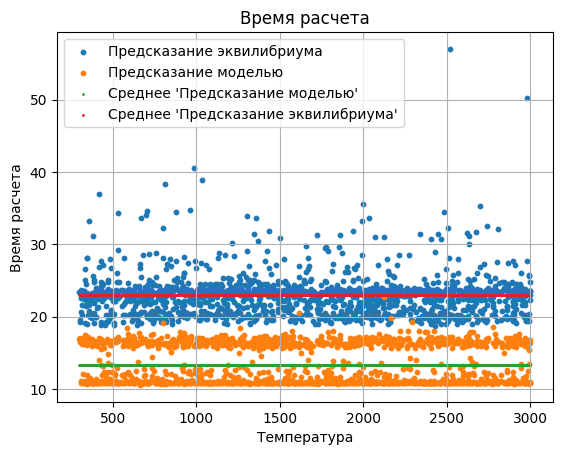

In [159]:
drawTime(df)

mean model time = 11.177458321885897
mean equilibrium time = 22.64464048591278
median model time = 10.897290536498986
median equilibrium time = 22.58959151199815


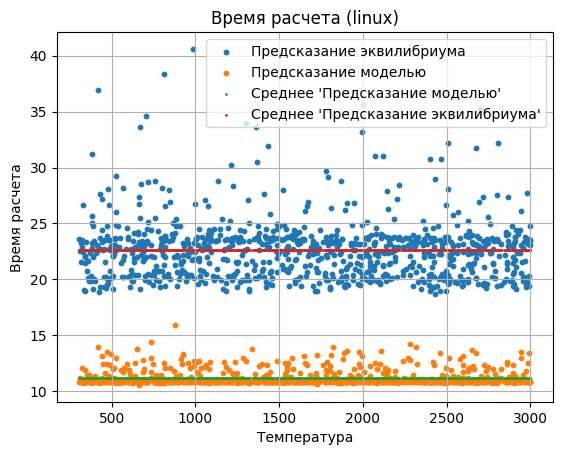

In [160]:
# df[(df['gm_time'] > df['gm_time'].mean())& (df['iter'] < 1425) ].sort_values(by=['iter'])
# & (df['iter'] < 1400)

drawTime(df[(df['iter'] > 532)& (df['iter'] < 1425) ].sort_values(by=['iter']), 'Время расчета (linux)')

mean model time = 16.48640287787113
mean equilibrium time = 23.371383839823707
median model time = 16.46803799999998
median equilibrium time = 23.36367107299884


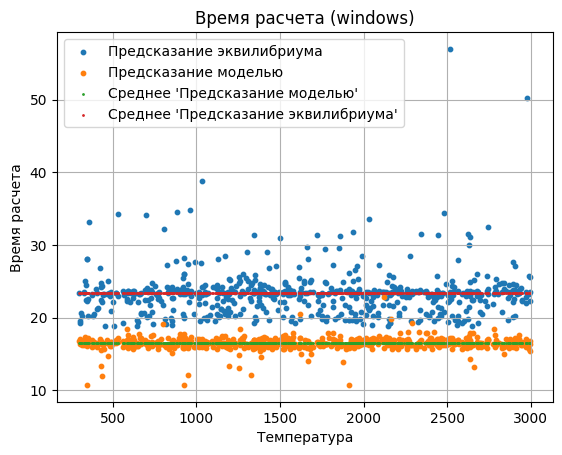

In [161]:
drawTime(df[(df['iter'] <= 532)| (df['iter'] >= 1425) ].sort_values(by=['iter']), 'Время расчета (windows)')